In [ ]:
## import basic libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
dataset = pd.read_csv('Churn_Modelling02.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619.0,France,Female,42,2,0.00,1,1.0,1,101348.88,1
1,2,15647311,Hill,608.0,Spain,Female,41,1,83807.86,1,0.0,1,112542.58,0
2,3,15619304,Onio,502.0,France,Female,42,8,159660.80,3,1.0,0,113931.57,1
3,4,15701354,Boni,699.0,France,Female,39,1,0.00,2,0.0,0,93826.63,0
4,5,15737888,Mitchell,850.0,Spain,Female,43,2,125510.82,1,1.0,1,79084.10,0


In [ ]:
## divide the datset into  dependent and independent colums
X = dataset.iloc[: ,3:13 ]
y = dataset.iloc[: , 13]

In [ ]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619.0,France,Female,42,2,0.00,1,1.0,1,101348.88
1,608.0,Spain,Female,41,1,83807.86,1,0.0,1,112542.58
2,502.0,France,Female,42,8,159660.80,3,1.0,0,113931.57
3,699.0,France,Female,39,1,0.00,2,0.0,0,93826.63
4,850.0,Spain,Female,43,2,125510.82,1,1.0,1,79084.10


In [ ]:
y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


In [ ]:
dataset.shape

(10000, 14)

In [ ]:
dataset.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,400
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [ ]:
# Remove rows where 'HasCrCard' is null
dataset1 = dataset.dropna(subset=['HasCrCard'])

In [ ]:
dataset1.shape

(9750, 14)

In [ ]:
dataset1.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,389
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [ ]:
dataset1 = dataset.dropna(subset=['HasCrCard']).copy()  # Ensure an independent copy

# Fill missing 'CreditScore' values safely
dataset1['CreditScore'] = dataset1['CreditScore'].fillna(dataset1['CreditScore'].mean())

# Now create dataset2 as a separate copy if needed
dataset2 = dataset1.copy()


In [ ]:

pd.concat([dataset.iloc[[14]], dataset2.iloc[[14]]], axis=0)  # Display both side by side


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
14,15,15600882,Scott,NaN,Spain,Female,35,7,0.0,2,1.0,1,65951.65,0
14,15,15600882,Scott,650.598227,Spain,Female,35,7,0.0,2,1.0,1,65951.65,0


In [ ]:
from scipy.stats import zscore


z_scores = zscore(dataset2['CreditScore'].dropna())
outliers = (z_scores > 3) | (z_scores < -3)

# Count the number of outliers
outliers.sum()


11

In [ ]:
# Applying winsorization to treat the outliers
# Define the winsorization limits (5% from both tails)
from scipy.stats.mstats import winsorize
lower_limit = 0.05  # 5th percentile
upper_limit = 0.05  # 95th percentile

# Apply Winsorization to 'CreditScore'
dataset2['CreditScore'] = winsorize(dataset2['CreditScore'], limits=[lower_limit, upper_limit])

In [ ]:
dataset2['CreditScore'].describe()

/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


,CreditScore
count,9750.000000
mean,651.050432
std,88.178391
min,492.000000
25%,587.000000
50%,650.598227
75%,714.000000
max,811.000000


In [ ]:
## Feature Engineering
geography = pd.get_dummies(X['Geography'],drop_first = True).astype(int)
gender = pd.get_dummies(X['Gender'],drop_first = True).astype(int)

In [ ]:
## concatenate these variable with dataframe
X = X.drop(['Geography','Gender'],axis = 1)

In [ ]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619.0,42,2,0.00,1,1.0,1,101348.88
1,608.0,41,1,83807.86,1,0.0,1,112542.58
2,502.0,42,8,159660.80,3,1.0,0,113931.57
3,699.0,39,1,0.00,2,0.0,0,93826.63
4,850.0,43,2,125510.82,1,1.0,1,79084.10


In [ ]:
dataset2.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [ ]:
dataset2.duplicated().sum()

0

In [ ]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9750 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        9750 non-null   int64  
 1   CustomerId       9750 non-null   int64  
 2   Surname          9750 non-null   object 
 3   CreditScore      9750 non-null   float64
 4   Geography        9750 non-null   object 
 5   Gender           9750 non-null   object 
 6   Age              9750 non-null   int64  
 7   Tenure           9750 non-null   int64  
 8   Balance          9750 non-null   float64
 9   NumOfProducts    9750 non-null   int64  
 10  HasCrCard        9750 non-null   float64
 11  IsActiveMember   9750 non-null   int64  
 12  EstimatedSalary  9750 non-null   float64
 13  Exited           9750 non-null   int64  
dtypes: float64(4), int64(7), object(3)
memory usage: 1.1+ MB


In [ ]:
dataset2['CreditScore'].describe()

/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


,CreditScore
count,9750.000000
mean,651.050432
std,88.178391
min,492.000000
25%,587.000000
50%,650.598227
75%,714.000000
max,811.000000


<Axes: ylabel='Frequency'>

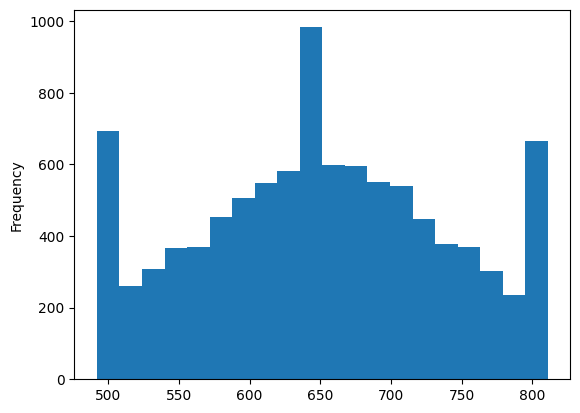

In [ ]:
dataset2['CreditScore'].plot(kind = 'hist', bins = 20)

<Axes: ylabel='Density'>

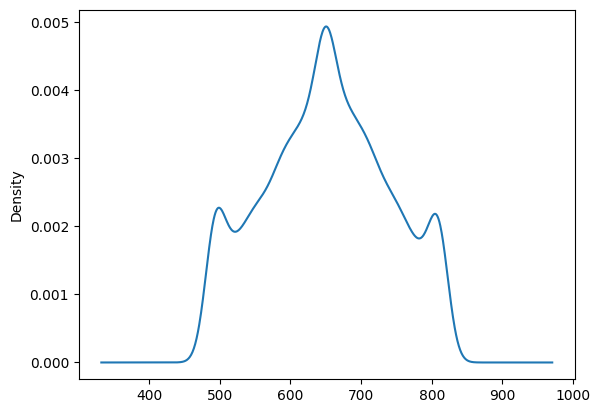

In [ ]:
dataset2['CreditScore'].plot(kind = 'kde')

In [ ]:
dataset2['CreditScore'].skew()

-0.005105569096359716

<Axes: >

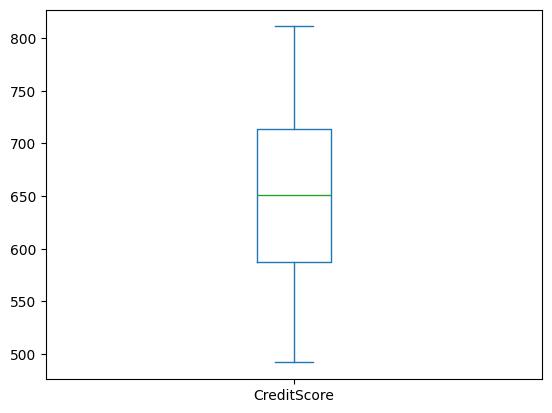

In [ ]:
dataset2['CreditScore'].plot(kind = 'box')

<Axes: ylabel='Frequency'>

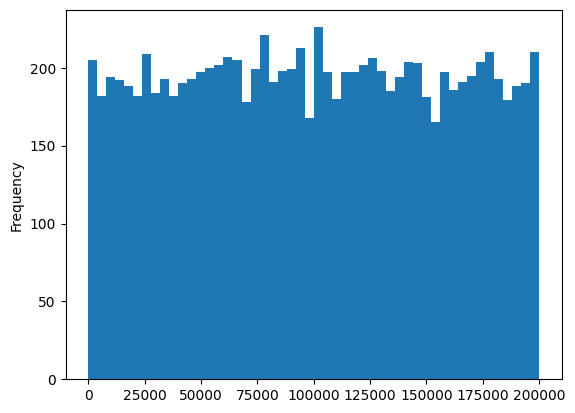

In [ ]:
dataset2['EstimatedSalary'].plot(kind = 'hist', bins = 50)

<Axes: ylabel='Density'>

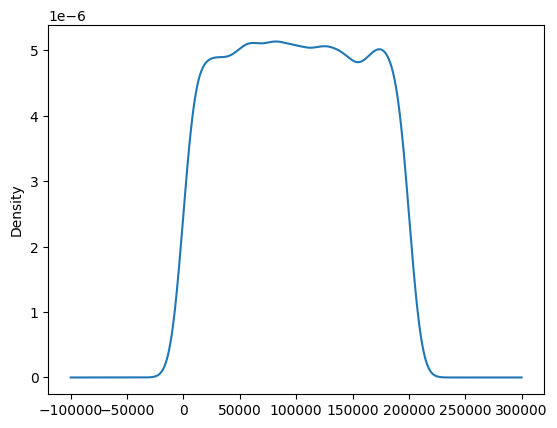

In [ ]:
dataset2['EstimatedSalary'].plot(kind = 'kde')

In [ ]:
dataset2['EstimatedSalary'].skew()

0.004971661359197793

<Axes: >

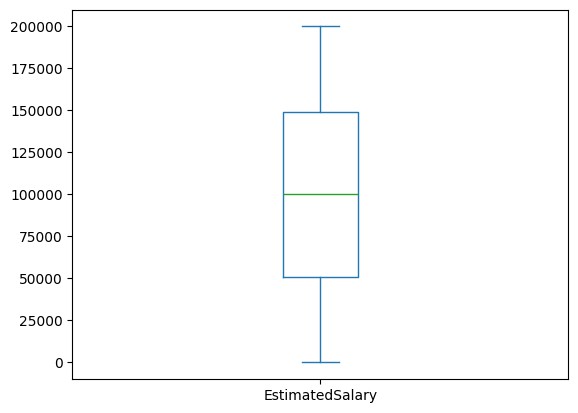

In [ ]:
dataset2['EstimatedSalary'].plot(kind = 'box')

In [ ]:
pd.crosstab(dataset2['Exited'],dataset['HasCrCard'],normalize='columns')*100

HasCrCard,0.0,1.0
Exited,,
0,79.111267,79.860708
1,20.888733,20.139292


In [ ]:
pd.crosstab(dataset2['Exited'],dataset['IsActiveMember'],normalize = 'columns')*100

IsActiveMember,0,1
Exited,,
0,73.293769,85.59221
1,26.706231,14.40779


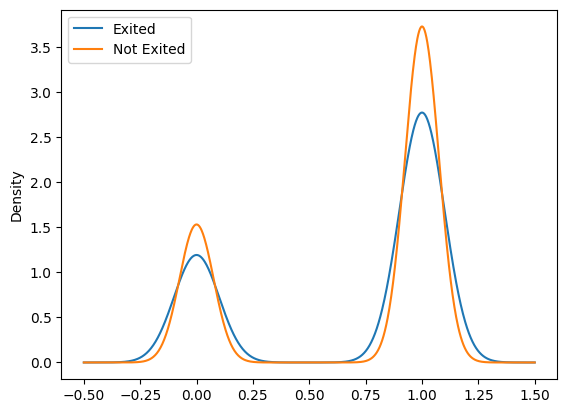

In [ ]:
# crCard and exited
dataset2[dataset2['Exited'] == 1]['HasCrCard'].plot(kind='kde',label='Exited')
dataset2[dataset2['Exited'] == 0]['HasCrCard'].plot(kind='kde',label='Not Exited')

plt.legend()
plt.show()

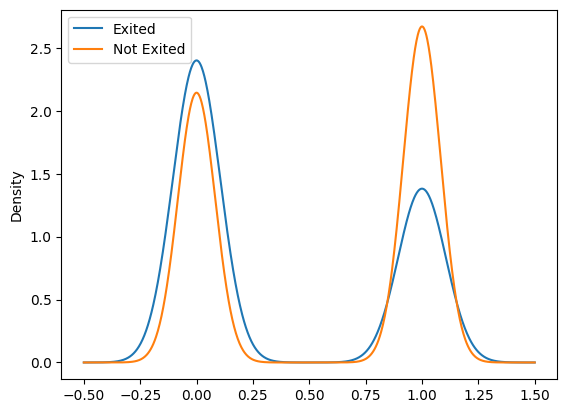

In [ ]:
# Active Member and exited
dataset2[dataset2['Exited'] == 1]['IsActiveMember'].plot(kind='kde',label='Exited')
dataset2[dataset2['Exited'] == 0]['IsActiveMember'].plot(kind='kde',label='Not Exited')

plt.legend()
plt.show()

<Axes: xlabel='HasCrCard'>

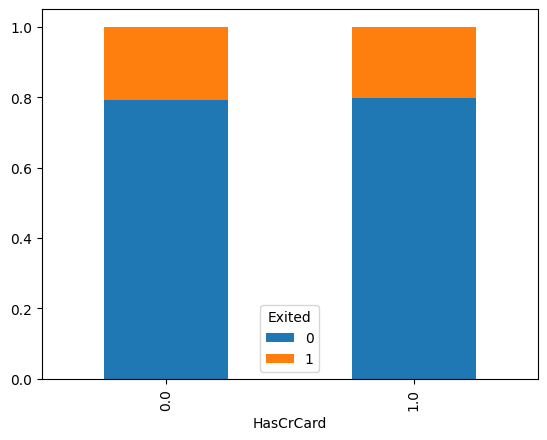

In [ ]:
pd.crosstab(dataset2['HasCrCard'],dataset2['Exited'],normalize='index').plot(kind='bar',stacked=True)

<Axes: xlabel='IsActiveMember'>

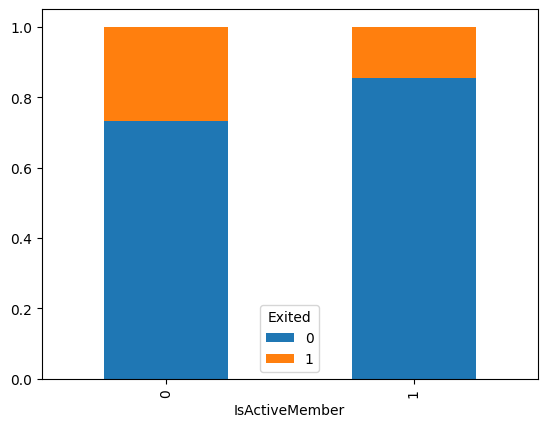

In [ ]:
pd.crosstab(dataset2['IsActiveMember'],dataset2['Exited'],normalize='index').plot(kind='bar',stacked=True)

<Axes: xlabel='HasCrCard', ylabel='Exited'>

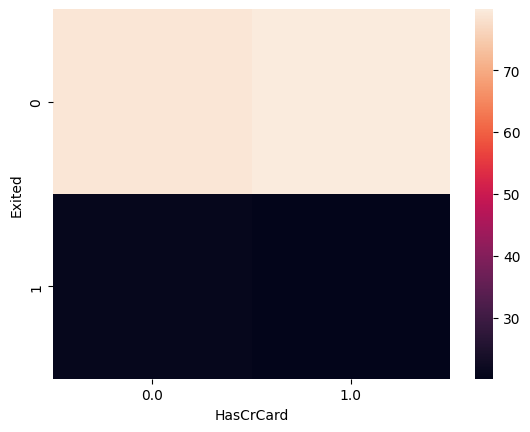

In [ ]:
## Heatmaps to visualize correlations among multiple variables.
sns.heatmap(pd.crosstab(dataset2['Exited'],dataset2['HasCrCard'],normalize='columns')*100)

<Axes: xlabel='IsActiveMember', ylabel='Exited'>

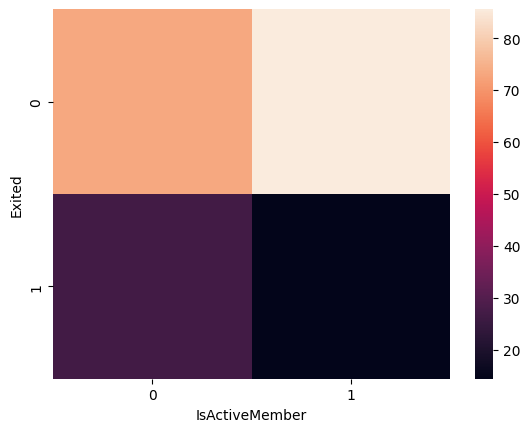

In [ ]:
sns.heatmap(pd.crosstab(dataset2['Exited'],dataset2['IsActiveMember'],normalize='columns')*100)

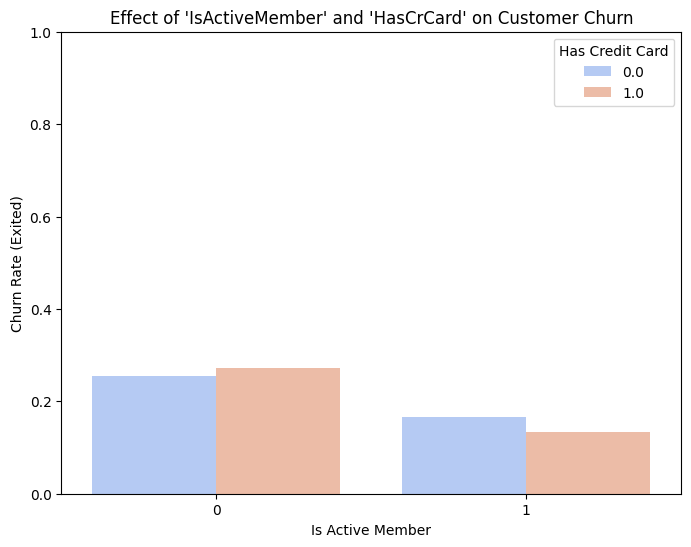

In [ ]:
# Grouped comparisons(combining 'IsActiveMember') and 'HasCrCard' to identify combined effects of multiple features on Exited or not exited
grouped_data = dataset2.groupby(['IsActiveMember', 'HasCrCard'])['Exited'].mean().reset_index()


plt.figure(figsize=(8, 6))
sns.barplot(x='IsActiveMember', y='Exited', hue='HasCrCard', data=grouped_data, palette="coolwarm")


plt.xlabel("Is Active Member")
plt.ylabel("Churn Rate (Exited)")
plt.title("Effect of 'IsActiveMember' and 'HasCrCard' on Customer Churn")
plt.ylim(0, 1)
plt.legend(title="Has Credit Card")

# Show the plot
plt.show()